In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset separated by ',' and having column names as 
# ['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type']
# where, glass_type is a categorical variable, and that is why we are applying logistic regression on it.

dataset = pd.read_csv('/content/glass.data', sep=',', names = ['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type'])
dataset.head()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Checking the shape and information about the dataset
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


(214, 11)

This shows that our dataset has 214 rows, and 11 columns, and all the columns  are not containing any null values, 2 columns are of int type and all the remaining are of float datatype.

In [ ]:
# Checking the Statistical measures of the dataset.
dataset.describe()

# From this, we get to know that the column "id" has the maximum mean among
# all the columns because it is just the increasing sequence number.

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# **Data Visualization**

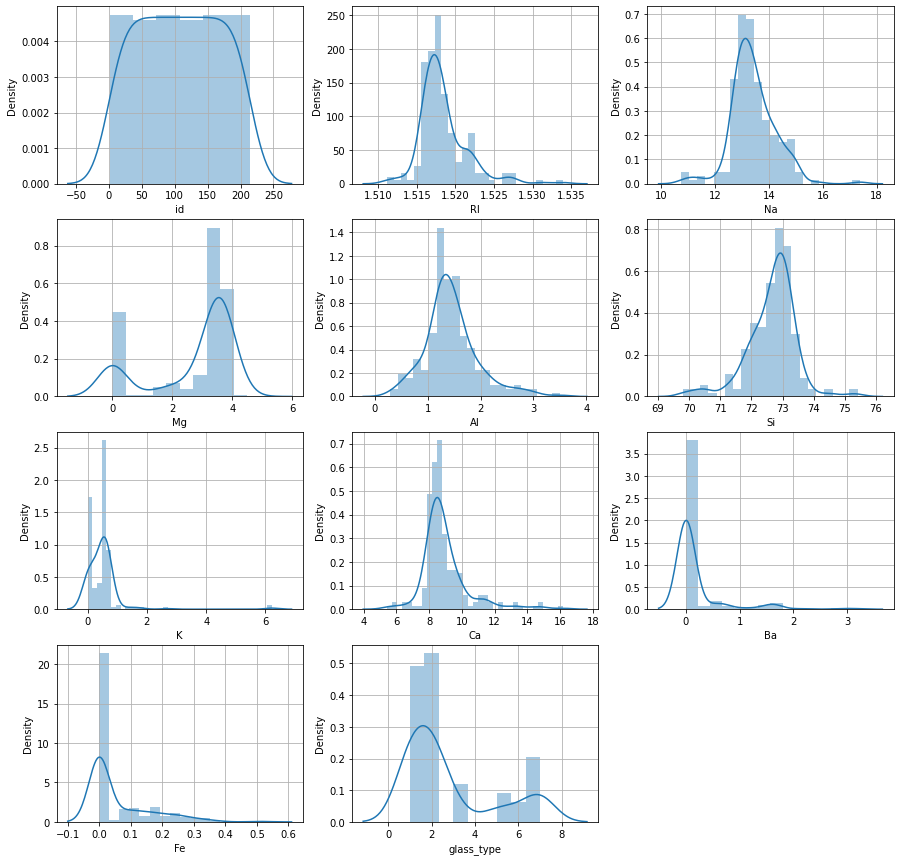

In [ ]:
# Checking the distribution of each column to figure out the variance.
# On the x-axis, we have the column values, and on the y-axis, we have the density of each value in the column.

# If we clearly observe the fifth graph, it is a perfect gaussian curve. Means the mean value lies within the
# range of 1.25 - 1.75.

plt.figure(figsize=(15, 15))
column_list = list(dataset.columns)

for i in range(len(column_list)):
  plt.subplot(4, 3, i+1)
  sns.distplot(dataset[column_list[i]], hist=True)
  plt.grid()

plt.show()

<Figure size 1440x720 with 0 Axes>

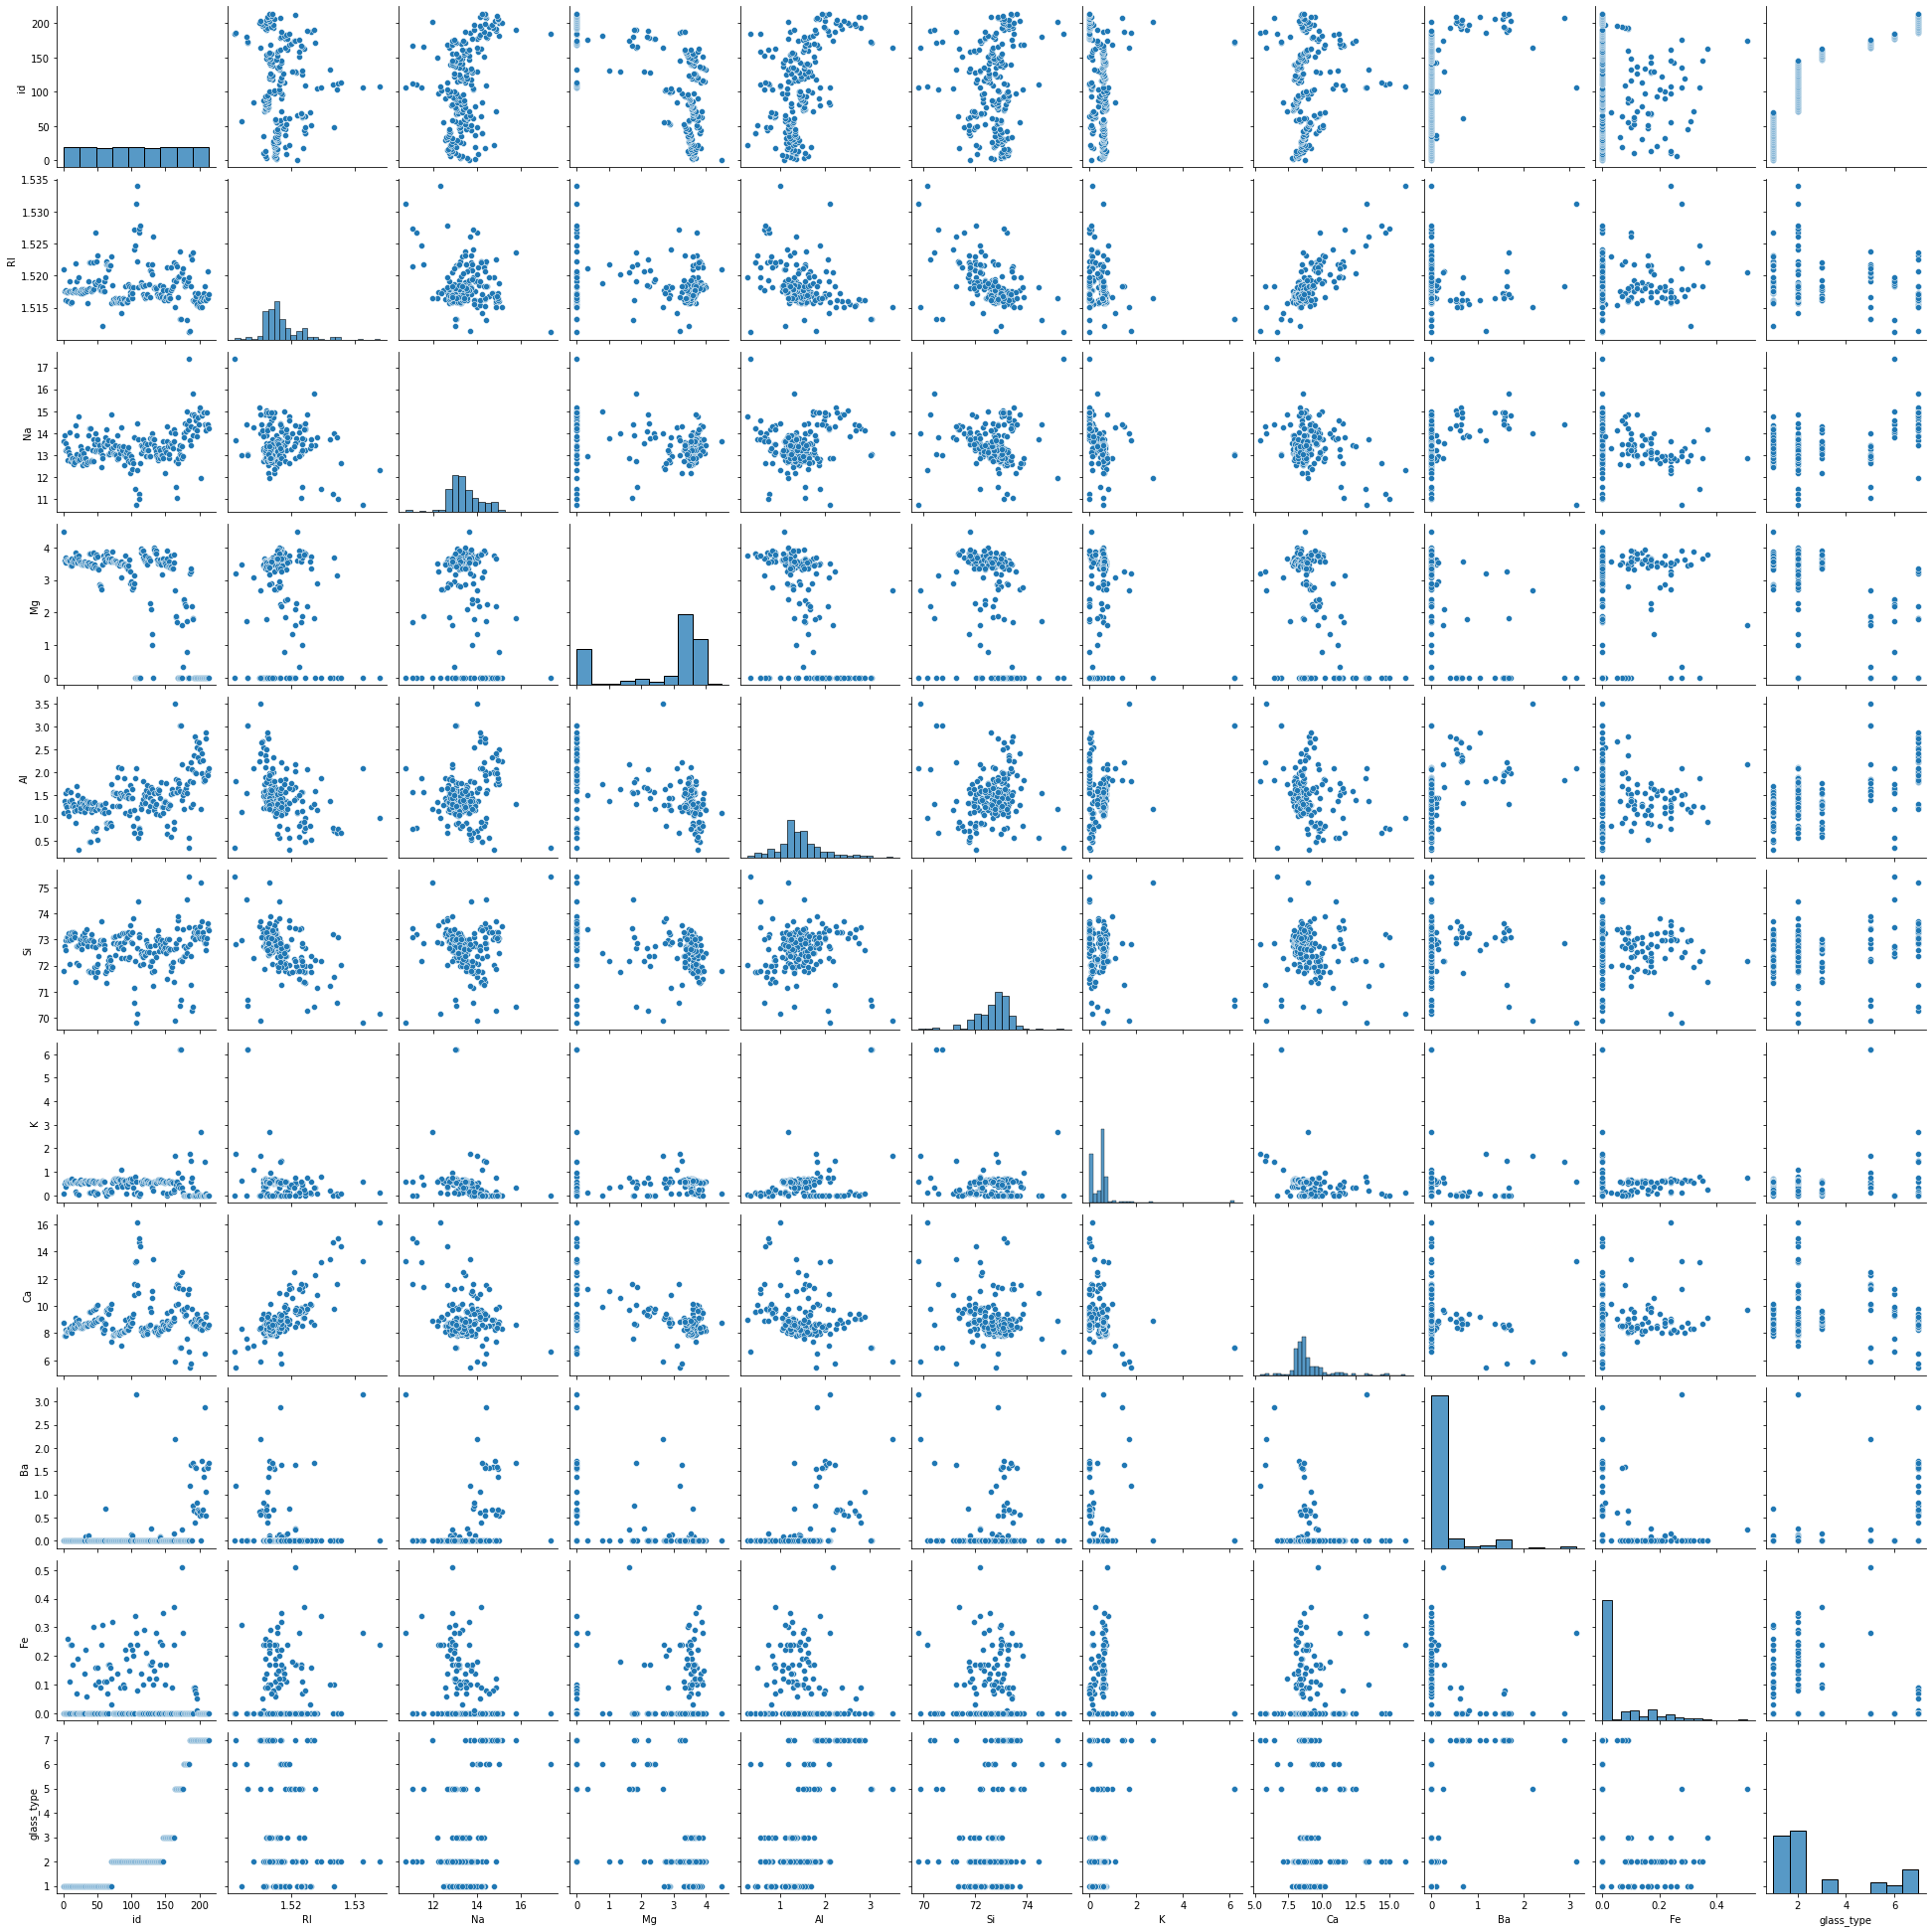

In [ ]:
# Scatter plots to understand relationship between different columns and segregation of classes

# As we can see that, there is one histogram in each row, because there x, and y axis have the same values, and 
# histogram is drawn only with respect to one column. But the remaining graphs are scatter plots, as it is drawn 
# with respect to two column values. // same as Quest 2(d) 

plt.figure(figsize=(20, 10))
sns.pairplot(dataset)
plt.show()

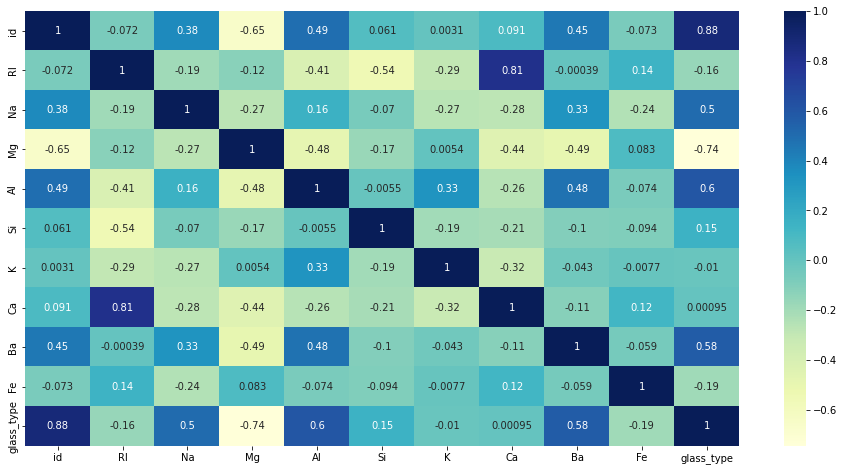

In [ ]:
# Correlation matrix & Heatmap to understand dependence among independent variables

plt.figure(figsize=(16,8))
correlation = dataset.corr()
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

# From this correlation matrix, we can see that some columns are highly correlated with each other,
# as their corr value > 0.8.

# The columns "RI" and "Ca" have a correlation ratio of 0.81, 
# and "id" and "glass_type" have a correlation ratio of 0.88

# **Data Preparation & Model Creation**

In this question, the "glass_type" is our target variable, which maps to the type of glass.

Mapping = {
  
  1: building_windows_float_processed,\
  2: building_windows_non_float_processed,\
  3: vehicle_windows_float_processed,\
  4: vehicle_windows_non_float_processed (none in this database),\
  5: containers,\
  6: tableware,\
  7: headlamps\
}

I'm dropping column "id" from the X, because column "id" is just a sequence number, and doesn't affect the target variable or make any kind of prediction.

In [ ]:
X = dataset.drop(columns=['id', 'glass_type'], axis=1)
Y = dataset['glass_type']

print(f"X: {X.shape}, Y: {Y.shape}")

X: (214, 9), Y: (214,)


In [ ]:
# Splitting the dataset into two parts for training and testing
# I'm taking 85 percent for training, and 15 percent for testing

x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size=0.15, random_state=42)
print(f"x_train: {x_train.shape}, y_train: {y_train.shape} \nx_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (181, 9), y_train: (181,) 
x_test: (33, 9), y_test: (33,)


In [ ]:
# As we can see that our data in each column is not in a fixed range of values or standardized
# we have to standardized our dataset to improve the performance of our model

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Creating a Logistic Regression model object
logistic_reg_model = LogisticRegression()

In [ ]:
logistic_reg_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
train_prediction = logistic_reg_model.predict(x_train)
test_prediction = logistic_reg_model.predict(x_test)

print(f"Train: {train_prediction.shape}, Test: {test_prediction.shape}")

Train: (181,), Test: (33,)


# **Accuracy & Other Important Metrics**

In [ ]:
# Accuracy and other metrices of the Linear Regression model
print(classification_report(y_test, test_prediction))

# From this we can see the precision, recall, f1-support of each target label.
# The accuracy of our model is around 73.0% 

              precision    recall  f1-score   support

           1       0.78      0.78      0.78         9
           2       0.57      0.80      0.67        10
           3       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       0.86      1.00      0.92         6

    accuracy                           0.73        33
   macro avg       0.70      0.60      0.61        33
weighted avg       0.72      0.73      0.70        33



## **Q. Which metric do you think is more relevant here? Explain.**

Ans. The metric which I am thinking is best for this case is the **classification_report** from the sklearn library, because this report gives us all the relavent metric in one go. 

This will show us the precision, recall, f1-score, support for each of the target label, which will help us to know that for which label, our model performs well or not.

Alternatively, we can use **confusion matrix** to get the matrix, which will tell us the value of True Positive, True Negative, False Positive, False Negative. Then using these values we can find the recall, precision and f1_score.